## Author : Loka Akash Reddy
### LGM VIP - Data Science September-2021
### Advanced Level Task 1 : Develop A Neural Network That Can Read Handwriting
### Importing required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from numpy import unique, argmax
import keras
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import datasets

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [3]:
#Loading the MNIST Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


In [5]:
#Normalization
X_train=X_train/255
X_test=X_test/255

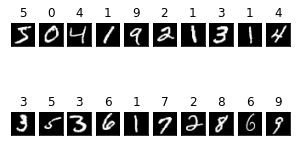

In [6]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(X_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [7]:
##Reshaping the training and test datasets
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Training model

In [12]:
## Training model using CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 27s 215ms/step - loss: 0.5360 - accuracy: 0.8562
Epoch 2/10
118/118 [==============================] - 26s 217ms/step - loss: 0.1182 - accuracy: 0.9649
Epoch 3/10
118/118 [==============================] - 28s 242ms/step - loss: 0.0799 - accuracy: 0.9757
Epoch 4/10
118/118 [==============================] - 25s 212ms/step - loss: 0.0612 - accuracy: 0.9819
Epoch 5/10
118/118 [==============================] - 24s 208ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 6/10
118/118 [==============================] - 25s 209ms/step - loss: 0.0440 - accuracy: 0.9866
Epoch 7/10
118/118 [==============================] - 25s 209ms/step - loss: 0.0389 - accuracy: 0.9882
Epoch 8/10
118/118 [==============================] - 25s 210ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 9/10
118/118 [==============================] - 26s 218ms/step - loss: 0.0304 - accuracy: 0.9906
Epoch 10/10
118/118 [==============================] - 27s 225ms/step - l

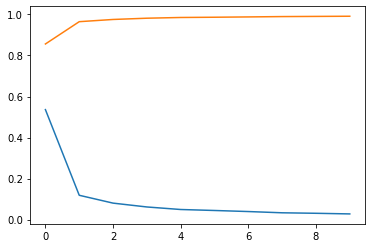

In [14]:
import pandas as pd
plt.plot(pd.DataFrame(model.history.history))

### Model Evaluation

In [15]:
#Model Comiled Successfully, Now Testing
model.evaluate(X_test,y_test,verbose=5)

[0.031591709703207016, 0.9887999892234802]

### Probablity of the model

In [16]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(X_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.08533701, 0.08533704, 0.08533752, 0.08533823, 0.08533701,
        0.08533701, 0.08533701, 0.23196505, 0.08533702, 0.08533711],
       [0.08533683, 0.08533749, 0.23196772, 0.08533683, 0.08533683,
        0.08533683, 0.08533686, 0.08533683, 0.08533683, 0.08533683],
       [0.08533832, 0.23194623, 0.08533839, 0.08533822, 0.08534016,
        0.08533861, 0.08533942, 0.08534395, 0.08533854, 0.08533824],
       [0.23182495, 0.08534587, 0.0853459 , 0.08534587, 0.08534587,
        0.08534588, 0.08540808, 0.08534587, 0.08534588, 0.08534589],
       [0.08533743, 0.08533743, 0.08533744, 0.08533744, 0.23195839,
        0.08533744, 0.08533747, 0.08533748, 0.08533748, 0.085342  ]],
      dtype=float32)>

In [17]:
Y_pred=[]
pred=model.predict(X_test)
for element in pred:
    Y_pred.append(np.argmax(element))

In [18]:
Y_pred=np.array(Y_pred)
Y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
cm

array([[ 972,    0,    1,    0,    0,    0,    3,    1,    3,    0],
       [   0, 1131,    1,    1,    0,    0,    1,    0,    1,    0],
       [   0,    1, 1025,    0,    1,    0,    1,    2,    2,    0],
       [   0,    0,    1, 1003,    0,    4,    0,    0,    2,    0],
       [   0,    0,    0,    0,  964,    0,    6,    0,    1,   11],
       [   2,    0,    0,    7,    0,  876,    4,    0,    2,    1],
       [   3,    2,    1,    0,    1,    1,  950,    0,    0,    0],
       [   0,    2,    9,    3,    0,    0,    0, 1009,    2,    3],
       [   2,    0,    3,    2,    0,    0,    0,    2,  962,    3],
       [   1,    2,    1,    1,    1,    3,    0,    2,    2,  996]],
      dtype=int64)

In [21]:
X_test=X_test.reshape(10000,28,28)

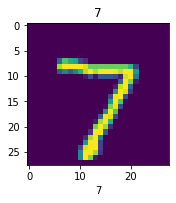

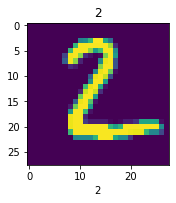

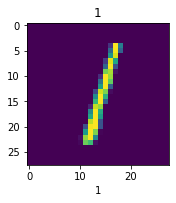

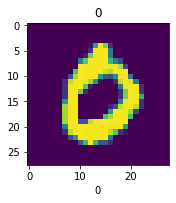

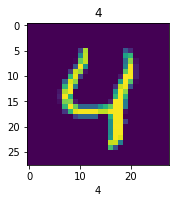

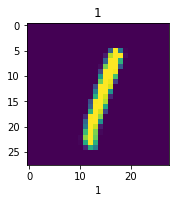

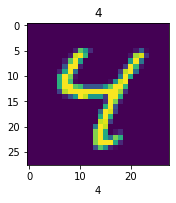

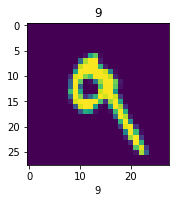

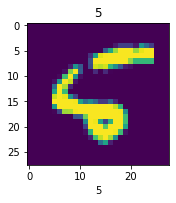

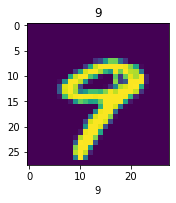

In [22]:
for i in range(0,10):
    plt.figure(figsize=(30,30))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_pred[i])
    plt.title(y_test[i])

In [23]:
actual=y_test
predicted=Y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


Text(114.0, 0.5, 'Actual')

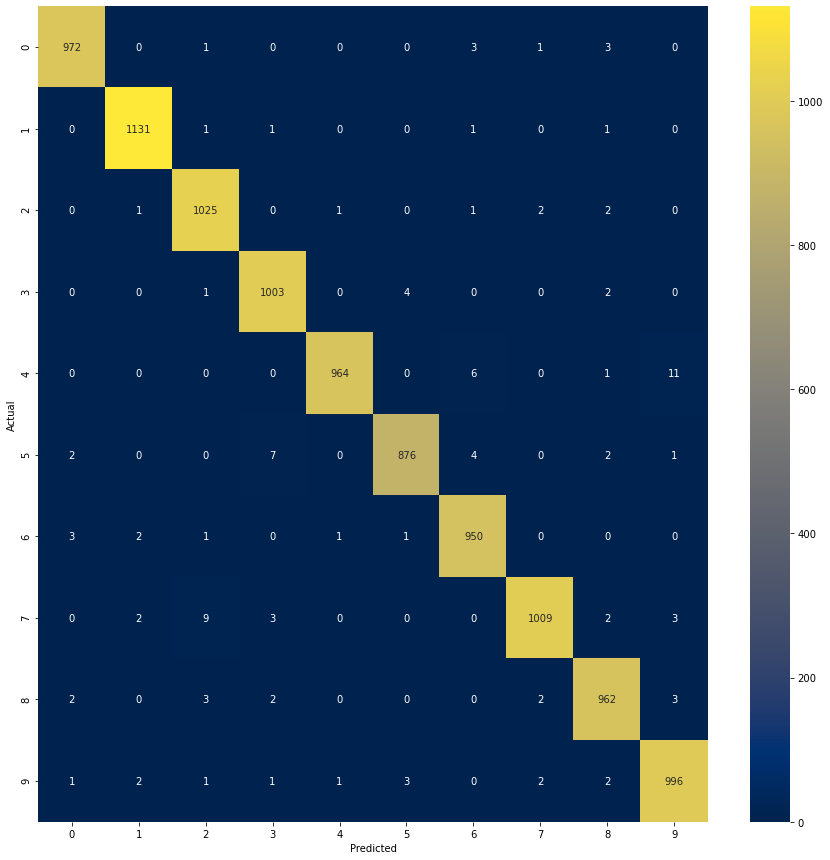

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,cmap="cividis",annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Thank You